# EMNIST

In [9]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from emnist import extract_training_samples,extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# # Load EMNIST dataset
train_images, train_labels = extract_training_samples('bymerge')
test_images, test_labels = extract_test_samples('bymerge')

"""
Remove additional lowercase alphabets from the dataset. ~ 11 additional classes at the end.
"""
# np.save('emnist_letter_train_images.npy', emnist_images)
# np.save('emnist_letter_train_labels.npy', emnist_labels)

'\nRemove additional lowercase alphabets from the dataset. ~ 11 additional classes at the end.\n'

#### Lable mapping

- Removing unneccessary last 11 classes

In [3]:
# Identify the labels you want to keep (first 36 classes)
valid_labels = set(range(36))
def filter_data(data,labels):
    # Filter the labels and corresponding data
    filtered_indices = [i for i, label in enumerate(labels) if label in valid_labels]
    filtered_labels = labels[filtered_indices]
    # Assuming emnist_data is your array of corresponding data
    filtered_data = data[filtered_indices]
    return filtered_data, filtered_labels

In [4]:
train_images, train_labels = filter_data(train_images, train_labels)
test_images, test_labels = filter_data(test_images, test_labels)
# Saving filtered data locally
if os.path.isdir('data') == False:
    os.mkdir('data')   
np.save('data/emnist36_train.npy', train_images)
np.save('data/emnist36_train_labels.npy', train_labels)
np.save('data/emnist36_test.npy', test_images)
np.save('data/emnist36_test_labels.npy', test_labels)

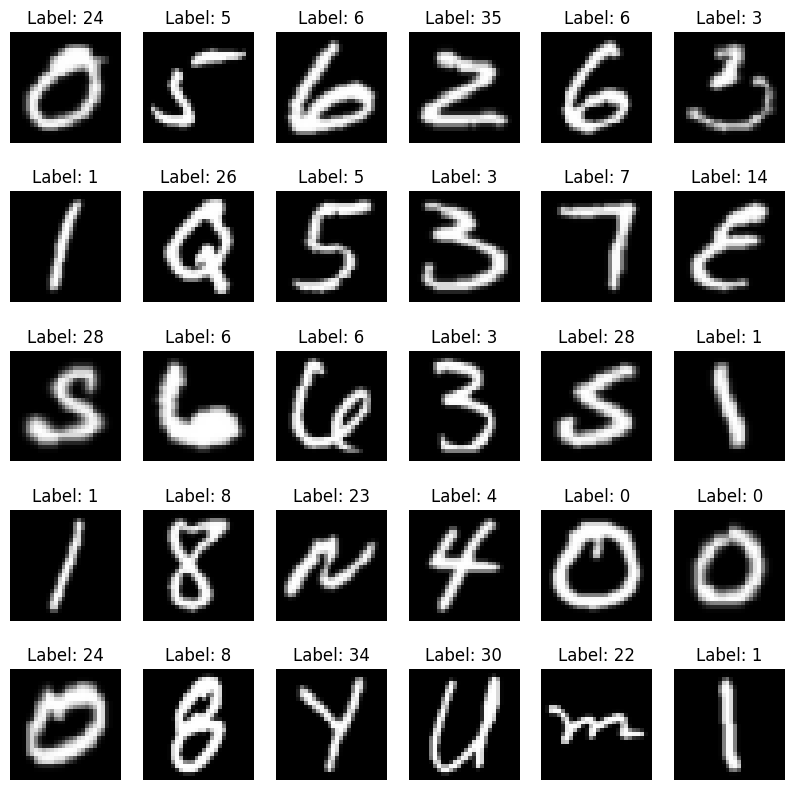

In [5]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

- Mapping labels for visualization clarity

In [6]:
"""
Working on mapping
"""
# Assuming emnist_labels is the array of original labels
# emnist_labels = np.array([0, 1, 2, ..., 45, 46])

# Define a mapping for digits and alphabets
digit_mapping = {i: str(i) for i in range(10)}
alphabet_mapping = {i: chr(i + 55) for i in range(10,47)}  # ASCII code for 'A' is 65, so we use 55 to map to 11

# Apply the mapping to the labels
mapped_labels = np.array([digit_mapping[label] if label < 10 else alphabet_mapping[label] for label in train_labels])


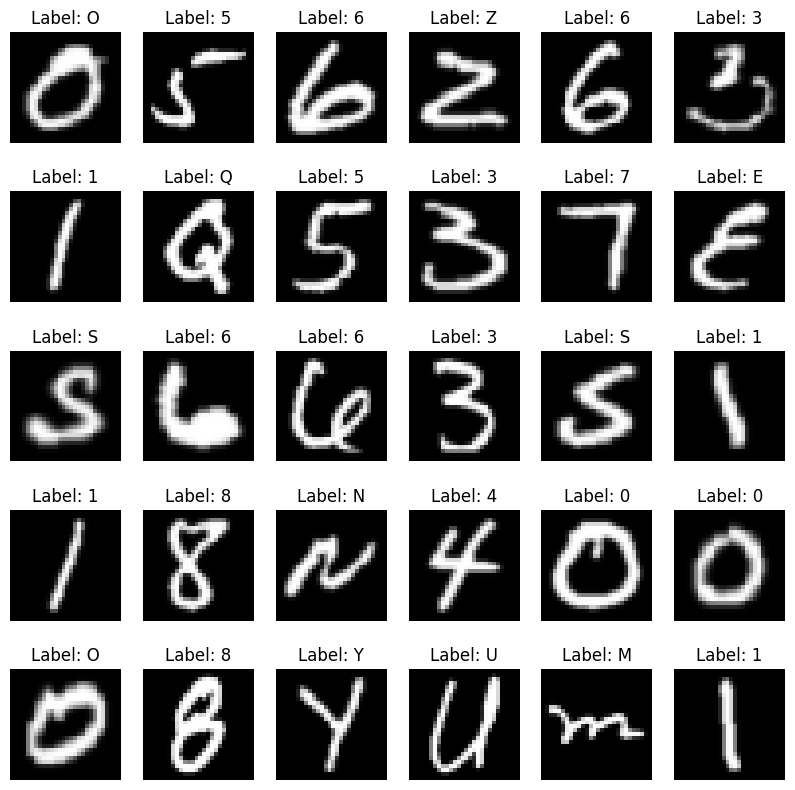

In [7]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {mapped_labels[i]}")
    plt.axis('off')
plt.show()

In [24]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(36, activation='softmax'))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model on the MNIST dataset
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
7331/7331 [==============================] - 19s 3ms/step - loss: 1.8886 - accuracy: 0.5724 - val_loss: 1.0281 - val_accuracy: 0.6813
Epoch 2/10
7331/7331 [==============================] - 18s 2ms/step - loss: 0.9655 - accuracy: 0.6985 - val_loss: 0.9619 - val_accuracy: 0.7073
Epoch 3/10
7331/7331 [==============================] - 17s 2ms/step - loss: 0.9231 - accuracy: 0.7122 - val_loss: 0.9512 - val_accuracy: 0.7130
Epoch 4/10
7331/7331 [==============================] - 18s 2ms/step - loss: 0.9034 - accuracy: 0.7180 - val_loss: 0.9011 - val_accuracy: 0.7289
Epoch 5/10
7331/7331 [==============================] - 18s 2ms/step - loss: 0.8868 - accuracy: 0.7233 - val_loss: 0.9441 - val_accuracy: 0.7100
Epoch 6/10
7331/7331 [==============================] - 18s 2ms/step - loss: 0.8838 - accuracy: 0.7249 - val_loss: 0.8994 - val_accuracy: 0.7146
Epoch 7/10
7331/7331 [==============================] - 17s 2ms/step - loss: 0.8781 - accuracy: 0.7249 - val_loss: 0.9103 - val_ac

In [20]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

3052/3052 [==============================] - 4s 1ms/step - loss: 0.9527 - sparse_categorical_accuracy: 0.7063
Test accuracy: 0.7062751054763794


In [21]:
test_label_predict = model.predict(test_images)
test_label_predict = tf.argmax(test_label_predict, axis=1).numpy()

3052/3052 [==============================] - 4s 1ms/step


In [22]:
import random
# Generate 9 random numbers between 0 and 20800
random_numbers = random.sample(range(20800), 25)

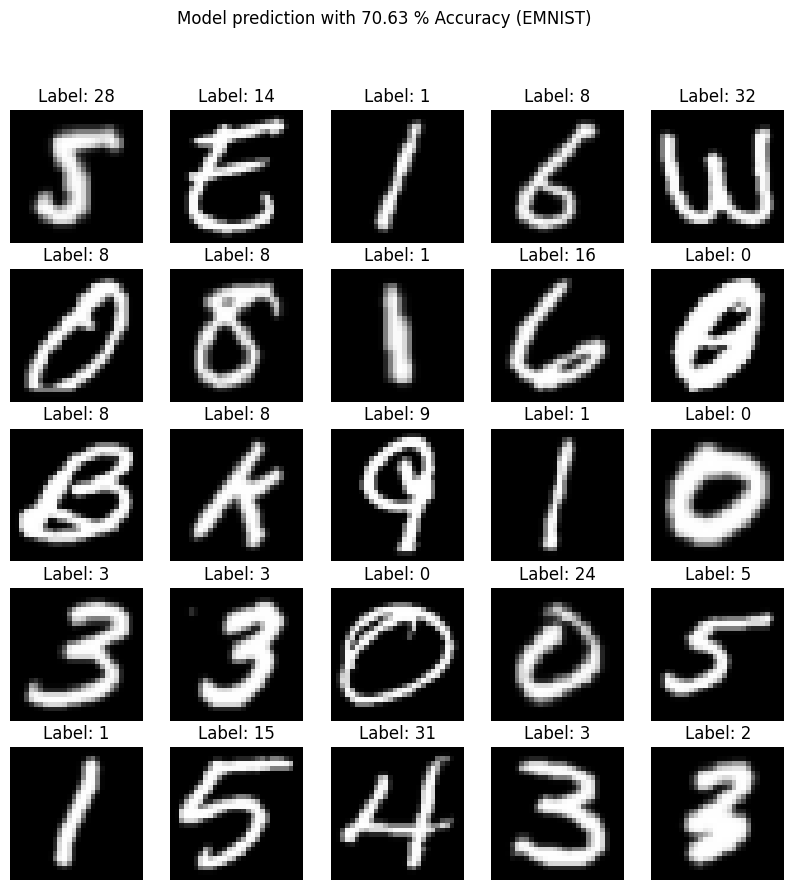

In [23]:
# Display some random images
plt.figure(figsize=(10, 10))
j = 0
for i in random_numbers:
    plt.subplot(5, 5, j+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {test_label_predict[i]}")
    plt.axis('off')
    plt.suptitle('Model prediction with {} % Accuracy (EMNIST)'.format(round((test_acc*100),2)))
    j+=1
plt.show()